# Crypto Notebook

This demonstrates dealing with reddit logs and pulling out information regarding different coins.

In [5]:
import pandas as pd
import json
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize

## Read in the list of coins and their trading name (e.g., BTC)

Note: This should be changed to pull from an API as my list is incomplete

In [6]:
coin_df = pd.read_csv('coins.csv', header='infer')
coin_df.head(20)
symbol_list = coin_df['Symbol'].tolist()

In [6]:
symbol_list

['BTC',
 'ETH',
 'XRP',
 'BCH',
 'EOS',
 'LTC',
 'XLM',
 'ADA',
 'MIOTA',
 'TRX',
 'USDT',
 'NEO',
 'DASH',
 'XMR',
 'BNB',
 'XEM',
 'VEN',
 'ETC',
 'ONT',
 'OMG',
 'QTUM',
 'ZEC',
 'ICX',
 'BCN',
 'LSK',
 'DCR',
 'ZIL',
 'AE',
 'BTG',
 'BTM',
 'ZRX',
 'SC',
 'XVG',
 'STEEM',
 'BTS',
 'REP',
 'NANO',
 'RHOC',
 'WAVES',
 'DOGE',
 'BCD',
 'MKR',
 'WAN',
 'BTCP',
 'GNT',
 'STRAT',
 'PPT',
 'DGB',
 'WTC',
 'SNT',
 'NAS',
 'BAT',
 'HT',
 'HSR',
 'IOST',
 'KCS',
 'DGD',
 'AION',
 'LRC',
 'KMD',
 'GXS',
 'BNT',
 'ARDR',
 'CNX',
 'RDD',
 'MOAC',
 'ELF',
 'MONA',
 'MAID',
 'ARK',
 'ELA',
 'DCN',
 'PIVX',
 'CMT',
 'GAS',
 'BIX',
 'MITH',
 'KNC',
 'WICC',
 'VERI',
 'FSN',
 'FUN',
 'SYS',
 'DROP',
 'ETHOS',
 'CTXC',
 'QASH',
 'DDD',
 'EMC',
 'NXT',
 'KIN',
 'LOOM',
 'MANA',
 'SUB',
 'NULS',
 'ENG',
 'FCT',
 'POLY',
 'XZC',
 'DRGN',
 'POWR',
 'THETA',
 'BLOCK',
 'BFT',
 'MTC',
 'STORM',
 'NXS',
 'EOSDAC',
 'ETN',
 'GTO',
 'GBYTE',
 'PAYX',
 'CENNZ',
 'MCO',
 'DBC',
 'ZEN',
 'SMART',
 'GTC',
 'STORJ

## Working with Reddit data

Each line in the file is a JSON document. This is an example:

{"body": "So.. nobody told you about XRP?", "edited": false, "permalink": "/r/CryptoCurrency/comments/7nbplq/the_crypto_currency_event_horizion/ds0n4gt/", "subreddit_type": "public", "author_flair_css_class": "noflair", "stickied": false, "author": "RobotSkeleton", "subreddit": "CryptoCurrency", "author_flair_text": "", "created_utc": 1514764850, "subreddit_id": "t5_2wlj3", "distinguished": null, "parent_id": "t3_7nbplq", "score": 2, "is_submitter": false, "gilded": 0, "id": "ds0n4gt", "can_gild": true, "link_id": "t3_7nbplq", "retrieved_on": 1517433480, "controversiality": 0}

# Example extraction

This very inefficiently iterates through the comments and makes a dataframe of coin code, message body, and timestamp.

Note: This is broken and finds a lot of references to coins that are simply substrings of words.

In [8]:
filename = "RC_2018-01-01-crypto.txt"
coinoccurances = []
with open (filename) as f:
    all_data = f.readlines()
    for line in all_data:
        rc = json.loads(line)
        token_comments = word_tokenize(rc['body'])
        for i in symbol_list:
            if i in token_comments:
                coinoccurances.append({'time': rc['created_utc'], 'body': rc['body'], 'coin': i})
            
#         for index, row in coin_df.iterrows():
#             if row['Symbol'].lower() in rc['body'].lower(): 
            # Lower was giving a lot of false positives
#             if row['Symbol'] in rc['body']:
#                 occurances.append({'time': rc['created_utc'], 'body': rc['body'], 'coin': row['Symbol']})
            

In [9]:
occurances_df = pd.DataFrame(coinoccurances)
occurances_df.tail(30)

,body,coin,time
6097,no XVG ? WTF,XVG,1514850910
6098,If you mean that Ripple holds 60% of the XRP i...,XRP,1514850927
6099,"I'd throw in some REQ, it's started to have so...",REQ,1514850946
6100,&gt;What i'm wondering is why customers would ...,WTC,1514850955
6101,&gt;What i'm wondering is why customers would ...,WABI,1514850955
6102,Which would prove what? That the coins actuall...,BTC,1514850986
6103,"Thanks for this! I follow this guy on YouTube,...",ICX,1514850993
6104,We're going to know if COSS is capable of nail...,COSS,1514851010
6105,You are spreading yourself too thin with only ...,BTC,1514851047
6106,You are spreading yourself too thin with only ...,ETH,1514851047


## Check what it looks like

In [11]:
# Get a count of the references
counts = occurances_df['coin'].value_counts()
counts.head()

REQ    520
BTC    480
ETH    407
XLM    391
XRP    357
Name: coin, dtype: int64

These are the most commonly referenced "real coins"

REQ       537 <br>
BTC       512 <br>
ETH       438 <br>
XLM       402 <br>
XRP       369 <br>

Plot a histogram of their references every 5 minutes

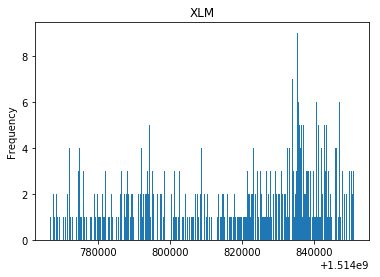

In [17]:
coin_name = ['REQ', 'BTC', 'ETH', 'XLM', 'XRP']
coin_name = ['XLM']
for name in coin_name:
    single_coin_df = xlmoccurances_df[xlmoccurances_df['coin'] == name]
    single_coin_df.head()
    plt.figure()
    single_coin_df.time.plot(kind='hist', bins=300, title=name)

## Get some price information

It seems we can grab tickers from here with high/low for 1min-3month intervals. Perhaps just grab some for the most frequently used coins. This link does not work at ANL though :(.

curl -X GET 'https://api.binance.com/api/v1/klines?symbol=REQBTC&interval=5m&limit=1000&startTime=1514764800000'

In [18]:
xlmbtc = []
with open('xlmbtc.txt') as f:
    xlmbtc = json.loads(f.readlines()[0])

print (reqbtc[0])

small_test = []
for p in xlmbtc:
    small_test.append([p[0], float(p[2])])
    
print (small_test[0])

[1514764800000, '0.00004347', '0.00004350', '0.00004336', '0.00004336', '70998.00000000', 1514765099999, '3.08365274', 89, '37848.00000000', '1.64435912', '0']
[1514764800000, 2.603e-05]


This data looks like: <br>
[ <br>
  [ <br>
    1499040000000,      // Open time <br>
    "0.01634790",       // Open <br>
    "0.80000000",       // High <br>
    "0.01575800",       // Low <br>
    "0.01577100",       // Close <br>
    "148976.11427815",  // Volume <br>
    1499644799999,      // Close time <br>
    "2434.19055334",    // Quote asset volume <br>
    308,                // Number of trades <br>
    "1756.87402397",    // Taker buy base asset volume <br>
    "28.46694368",      // Taker buy quote asset volume <br>
    "17928899.62484339" // Ignore <br>
  ] <br>
]

In [19]:
reqbtc_df = pd.DataFrame(small_test)
reqbtc_df.head()

,0,1
0,1514764800000,0.000026
1,1514765100000,0.000026
2,1514765400000,0.000027
3,1514765700000,0.000027
4,1514766000000,0.000027


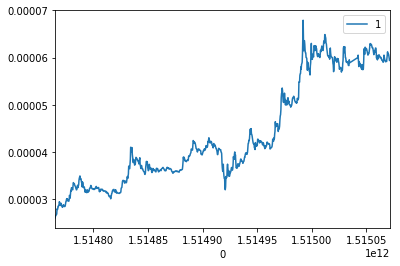

In [20]:
reqbtc_df.plot.line(x=0, y=1)

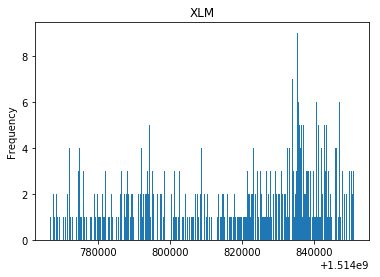

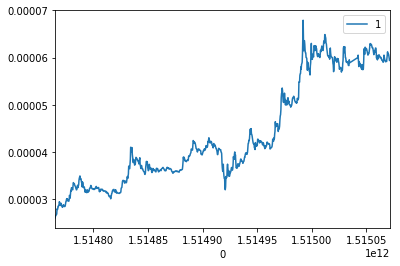

In [21]:
for name in coin_name:
    single_coin_df = xlmoccurances_df[xlmoccurances_df['coin'] == name]
    single_coin_df.head()
    ax = plt.figure()
    single_coin_df.time.plot(kind='hist', bins=300, title=name)
    reqbtc_df.plot.line(x=0, y=1)